# Subject: Data Science Foundation

## Session 8 - Probability distributions

### Demo 3 -  Hypothesis Testing Basics

Statistical hypothesis tests are based a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing. The exact form of the null hypothesis varies from one type test to another: if you are testing whether groups differ, the null hypothesis states that the groups are the same. For instance, if you wanted to test whether the average age of voters in your home Autonomous region differs from the national average, the null hypothesis would be that there is no difference between the average ages.

The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on. The exact form of the alternative hypothesis will depend on the specific test you are carrying out. Continuing with the example above, the alternative hypothesis would be that the average age of voters in your Autonomous region does in fact differ from the national average.

Once you have the null and alternative hypothesis in hand, you choose a significance level (often denoted by the Greek letter α.). The significance level is a probability threshold that determines when you reject the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.
The T-test is a statistical test used to determine whether a numeric data sample of differs significantly from the population or whether two samples differ from one another.

# 1. One-Sample T-Test

A one-sample t-test checks whether a sample mean differs from the population mean. Let's create some dummy age data for the population of voters in the entire Spain country and a sample of voters in Catalunya and test the whether the average age of voters Catalunya differs from the population:

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [13]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

Catalunya_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
Catalunya_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
Catalunya_ages = np.concatenate((Catalunya_ages1, Catalunya_ages2))

print( population_ages.mean() )
print( Catalunya_ages.mean() )

43.000112
39.26


Notice that we used a slightly different combination of distributions to generate the sample data for Catalunya, so we know that the two means are different. Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population. To conduct a one sample t-test, we can the stats.ttest_1samp() function:

In [14]:
stats.ttest_1samp(a= Catalunya_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

The test result shows the test statistic "t" is equal to -2.574. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

In [15]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [16]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.0095752344892088

We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:

In [17]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test*

0.013121066545690117

*Note: The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean. Since the sample could differ in either the positive or negative direction we multiply the by two.

Notice this value is the same as the p-value listed in the original t-test output. A p-value of 0.01311 means we'd expect to see data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis.

If we were to construct a 95% confidence interval for the sample it would not capture population mean of 43:

In [18]:
sigma = Catalunya_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = Catalunya_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(36.369669080722176, 42.15033091927782)

On the other hand, since there is a 1.3% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level. This means if we were to construct a 99% confidence interval, it would capture the population mean:

In [19]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = Catalunya_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(35.405479940921069, 43.114520059078927)

With a higher confidence level, we construct a wider confidence interval and increase the chances that it captures to true mean, thus making it less likely that we'll reject the null hypothesis. In this case, the p-value of 0.013 is greater than our significance level of 0.01 and we fail to reject the null hypothesis.

# 2. Type I and Type II Error

The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories: type I error and type II error.

- Type I error describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive". The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

- Type II error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative". The higher your confidence level, the more likely you are to make a type II error.
Let's investigate these errors with a plot:

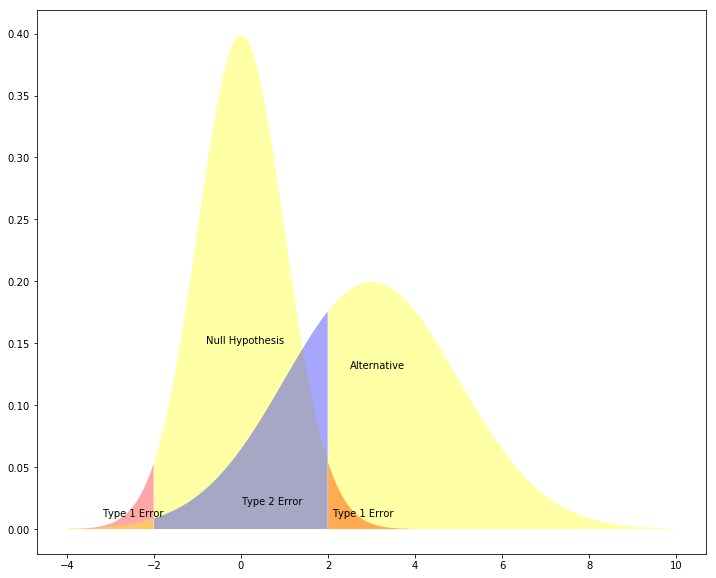

In [29]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='yellow',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='yellow',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='yellow',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

In the plot above, the red areas indicate type I errors assuming the alternative hypothesis is not different from the null for a two-sided test with a 95% confidence level.
The blue area represents type II errors that occur when the alternative hypothesis is different from the null, as shown by the distribution on the right. Note that the Type II error rate is the area under the alternative distribution within the quantiles determined by the null distribution and the confidence level.

We can calculate the type II error rate for the distributions above as follows:

In [26]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.29495606111232298

With the normal distributions above, we'd fail to reject the null hypothesis about 30% of the time because the distributions are close enough together that they have significant overlap.